In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as units
import scipy.sparse as sparse

In [2]:
%autoreload 2
import dualpy as dp
from dualpy.base_jacobian import BaseJacobian
from dualpy.sparse_jacobians import SparseJacobian
from dualpy.dense_jacobians import DenseJacobian

In [3]:
dependent_shape = [1000,30]
independent_shape = [10,30]
template = dp.BaseJacobian(
    dependent_unit=units.dimensionless_unscaled,
    independent_unit=units.dimensionless_unscaled,
    dependent_shape=dependent_shape,
    independent_shape=independent_shape)

In [4]:
fraction = 0.01
nValues = int(fraction*template.size)
i = (np.random.random(nValues)*template.size).astype(np.int64)
rows, cols = np.unravel_index(i, template.shape2d)
values = np.random.random(nValues)
m_coo = sparse.coo_matrix((values,(rows,cols)), template.shape2d)
m_csc = m_coo.tocsc()
j_random = SparseJacobian(template=template, data=m_csc)

In [5]:
fixed = np.zeros(shape=template.shape)
fixed[:,0,0,0] = 1.0
j_fixed = DenseJacobian(template=template, data=fixed)
j_fixed = SparseJacobian(j_fixed)

In [6]:
j = j_random
j_dense = DenseJacobian(j)
print(j)
print(j_dense)

Jacobian of type <class 'dualpy.sparse_jacobians.SparseJacobian'>
Dependent shape is (1000, 30) <30000>
Independent shape is (10, 30)<300>
Combined they are (1000, 30, 10, 30) <9000000>
Dummies are (1, 1) and (1, 1)
Units are d<>/d<> = 
data2d is (30000, 300) with 89530 numbers stored (0.99%)
Jacobian of type <class 'dualpy.dense_jacobians.DenseJacobian'>
Dependent shape is (1000, 30) <30000>
Independent shape is (10, 30)<300>
Combined they are (1000, 30, 10, 30) <9000000>
Dummies are (1, 1) and (1, 1)
Units are d<>/d<> = 
data is (1000, 30, 10, 30)
data2d is (30000, 300)


In [7]:
a = 1
s = j.cumsum(a)
s_dense = j_dense.cumsum(a)
s_test = DenseJacobian(s)

In [8]:
# word = [ f"{(100.0*m.data2d.getnnz())/m.size:.2f}%" for m in [j,s] ]
# print (f"Gone from {word[0]} to {word[1]}")

In [9]:
delta = s_dense.data2d - s_test.data2d

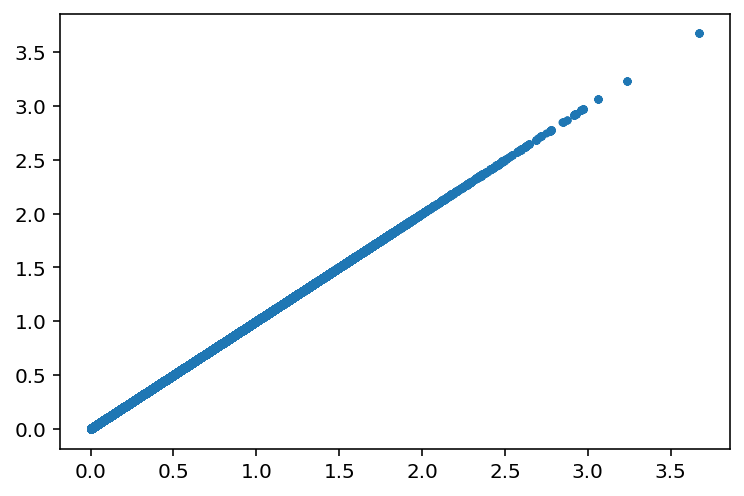

In [10]:
plt.plot(s_dense.data2d.ravel(),s_test.data2d.ravel(),'.')

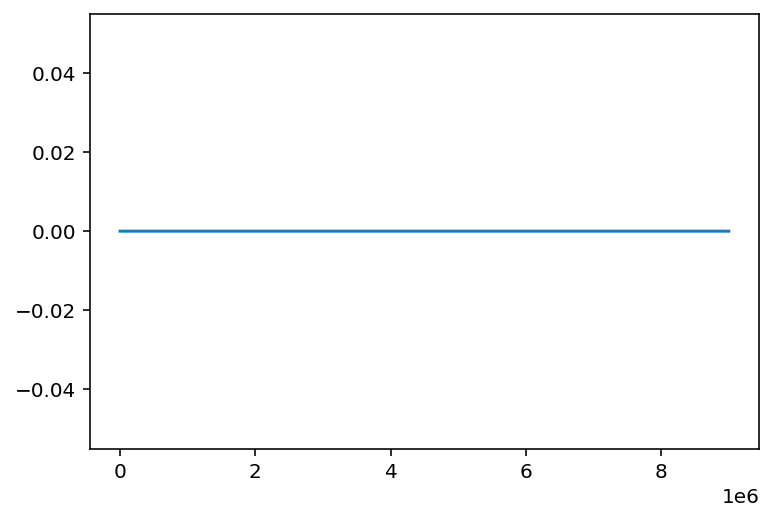

In [11]:
plt.plot(delta.ravel())